# ¿Qué factores impulsan la discriminación salarial entre hombres y mujeres en su organización?

El departamento de recursos humanos se ha puesto en contacto con usted como experto en aprendizaje automático para que les ayude a encontrar si existe una discriminicación salarial entre hombres y mujeres y encontrar cual es la razón. Para esto le ha proporcionado una base de datos de empleados que contiene información sobre diversos atributos como el rendimiento, la educación, los ingresos, la antigüedad, etc.

## Exploración de datos

Variables:

1. **job_title**: the title of the job (e.g. “Graphic Designer”, “Software Engineer”, etc)
2. **age_years**: age
3. **performance_score**: on a scale of 0 to 100, 0 being the lowest and 100 being the highest
4. **education**: different levels of education (e.g. "College", "PhD", "Masters", "Highschool")
5. **seniority_years**: years of seniority
6. **pay_yearly**: pay in dollars
7. **male_female**: male or female

Hay 241 hombres y 222 mujeres en este conjunto de datos, un total de 463 personas.

###  Ejercicio 1

Realizar una visualización que le permita comparar la remuneración entre hombres y mujeres.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv("data/company_dataset.csv")

In [2]:
data

,job_title,age_years,performance_score,education,seniority_years,pay_yearly,male_female
0,Project Manager,34,33.33,High School,4,118503,M
1,Marketing associate,66,16.67,High School,3,129393,M
2,Marketing associate,51,50.00,Masters,8,139440,M
3,Sales representative,26,16.67,Masters,3,118191,F
4,Account executive,36,50.00,PhD,4,77717,M
...,...,...,...,...,...,...,...
458,Dog trainer,59,100.00,PhD,9,120852,M
459,Dog trainer,40,66.67,College,8,96368,F
460,Sales representative,58,33.33,College,7,112027,F
461,Dog trainer,53,83.33,PhD,5,89330,F


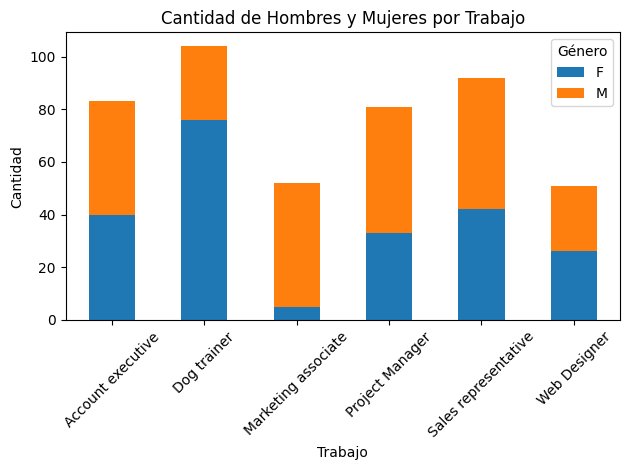

In [44]:
# Contar la cantidad de hombres y mujeres en cada trabajo
gender_counts = data.pivot_table(index='job_title', columns='male_female', aggfunc='size', fill_value=0)

gender_counts.plot(kind='bar', stacked=True)
plt.title('Cantidad de Hombres y Mujeres por Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()


Visualizaciones

<BarContainer object of 463 artists>

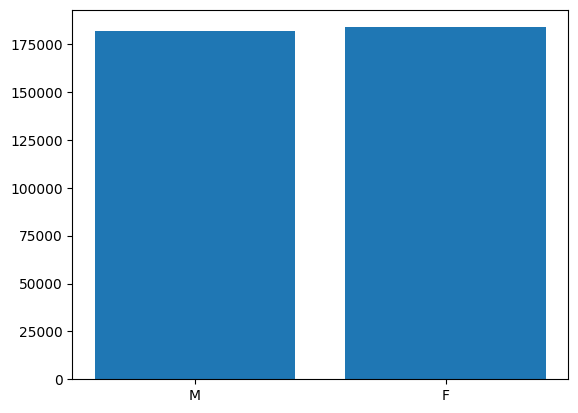

In [4]:
fig, ax = plt.subplots()
ax.bar(x = data['male_female'], height = data['pay_yearly'])

In [13]:
variable1 = data['male_female']
variable2 = data['pay_yearly']


plt.boxplot(data[variable1,variable2])

InvalidIndexError: (0      M
1      M
2      M
3      F
4      M
      ..
458    M
459    F
460    F
461    F
462    F
Name: male_female, Length: 463, dtype: object, 0      118503
1      129393
2      139440
3      118191
4       77717
        ...  
458    120852
459     96368
460    112027
461     89330
462     85458
Name: pay_yearly, Length: 463, dtype: int64)

Vamos a usar statsmodels para usar el ols(ordinary least squares). 

In [15]:
#import statsmodels.api as sm   #x0 toca agregarlo es el bias es uno 
import statsmodels.formula.api as sm  # aqui no toca agregar el bias, no necesitamos adicional la columna de uno 

-------

## ¿Cuáles son las variables que influyen en la remuneración?

¿Cómo se tiene en cuenta la influencia de las otras variables en la remuneración? ¿Cuáles son estas variables? Un buen punto de partida es inspirarse en un análisis exploratorio de datos.

In [28]:
# vamos a usar la regresion y vamos a ver que es lo que nos devulven y ver que es 

formula='pay_yearly ~ job_title + age_years + 	performance_score + education + male_female + seniority_years' # es un texto es la variable indepe y depediente 
modelo=sm.ols(formula,data=data)
modelo.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pay_yearly   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     38.41
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.11e-61
Time:                        20:02:03   Log-Likelihood:                -5199.9
No. Observations:                 463   AIC:                         1.043e+04
Df Residuals:                     450   BIC:                         1.048e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           4.41e+04   4251.087     10.373      0.000    3.57e+04    5.25e+04
job_title[T.Dog trainer]          -1.095e+04   2778.457     -3.942      0.000   -1.64e+04   -5491.545
job_title[T.Marketing associate]   1.337e+04   3368.690      3.970      0.000    6752.164       2e+04
job_title[T.Project Manager]       1.373e+04   2899.199      4.736      0.000    8032.270    1.94e+04
job_title[T.Sales representative] -1207.9643   2816.886     -0.429      0.668   -6743.848    4327.920
job_title[T.Web Designer]         -1455.6120   3307.946     -0.440      0.660   -7956.551    5045.327
education[T.High School]           -278.3053   2404.785     -0.116      0.908   -5004.309    4447.698
education[T.Masters]               4937.7643   2446.576      2.018      0.044     129.631    9745.898
education[T.PhD]                   9838.9167   2537.772      3.877      0.000    4851.562    1.48e+04
male_female[T.M]                   3709.8452   1853.780      2.001      0.046      66.704    7352.987
age_years                           666.1748     62.980     10.578      0.000     542.403     789.946
performance_score                    83.8079     31.411      2.668      0.008      22.077     145.539
seniority_years                    3613.3282    356.544     10.134      0.000    2912.630    4314.026
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.062
Skew:                          -0.028   Prob(JB):                        0.969
Kurtosis:                       3.002   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# que pasa si meto una variable categorica como male_female , los individuos 
formula2='pay_yearly ~ age_years + education + seniority_years' # es un texto es la variable indepe y depediente 
modelo2=sm.ols(formula2,data=data)
modelo2.fit().summary()

# entonces esto compara con la primera que esta en orden alfabetico y el coefecieinte muestra sobre que con resctecto las demas. 
# variables de coef altos negativos o positivios y que tenga una estadistica importante.por que impacta mas en la salida 
# el intervalo de confianza --> donde esta el valor entre mas o menos el coefiente es el promedio 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pay_yearly   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     52.21
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.42e-43
Time:                        19:05:40   Log-Likelihood:                -5258.5
No. Observations:                 463   AIC:                         1.053e+04
Df Residuals:                     457   BIC:                         1.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 5.091e+04   3537.742     14.390      0.000     4.4e+04    5.79e+04
education[T.High School]  1713.8266   2697.213      0.635      0.525   -3586.651    7014.304
education[T.Masters]      6510.2878   2742.713      2.374      0.018    1120.395    1.19e+04
education[T.PhD]          1.204e+04   2844.615      4.233      0.000    6450.113    1.76e+04
age_years                  685.8826     70.287      9.758      0.000     547.757     824.008
seniority_years           3237.9353    396.791      8.160      0.000    2458.174    4017.696
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.261
Skew:                           0.056   Prob(JB):                        0.878
Kurtosis:                       2.967   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula3='pay_yearly ~ age_years + education + seniority_years' # es un texto es la variable indepe y depediente 
modelo3=sm.ols(formula3,data=data)
modelo3.fit().summary()

In [41]:
male_data = data[data['male_female'] == 'M']
male_counts = male_data['job_title'].value_counts()
male_counts


job_title
Sales representative    50
Project Manager         48
Marketing associate     47
Account executive       43
Dog trainer             28
Web Designer            25
Name: count, dtype: int64

In [40]:
female_data = data[data['male_female'] == 'F']
print(female_data)
female_counts = male_data['job_title'].value_counts()
female_counts

                job_title  age_years  performance_score    education  \
3    Sales representative         26              16.67      Masters   
5             Dog trainer         36              50.00      College   
6       Account executive         35              33.33      College   
7             Dog trainer         18              83.33      College   
10            Dog trainer         54              50.00  High School   
..                    ...        ...                ...          ...   
456           Dog trainer         29              66.67  High School   
459           Dog trainer         40              66.67      College   
460  Sales representative         58              33.33      College   
461           Dog trainer         53              83.33          PhD   
462          Web Designer         41              50.00      College   

     seniority_years  pay_yearly male_female  
3                  3      118191           F  
5                  6       53533         

job_title
Sales representative    50
Project Manager         48
Marketing associate     47
Account executive       43
Dog trainer             28
Web Designer            25
Name: count, dtype: int64

In [ ]:
# ojo aqui se usa una metrica para mirar la presicion de un modelo de precision que es el r2
# que quiere decir que porcentaje de la variabilidad esta siendo explicada por las entradas 
# para saber si es importante es depende del estado del arte. 